In [1]:
import numpy as np 
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from cdo import *
import os
import pymannkendall as mk
CDO = Cdo()

## Generating very heavy precipitation files for each hour

In [15]:
hours = [3,6,9,12,15,18,21]
h=['03','06','09','12','15','18','21']
path='../A_Stack_Yearwise/Stacks'
op_path = '../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION'
for year in range(1998,2020):
    i=0
    for hour in hours:
        # file = open(f'{path}/{year}/{year}_{hour}_stack.nc','r')
        CDO.eca_r20mm(input=f'{path}/{year}/{year}_{hour}_stack.nc',output=f'{op_path}/{year}/{year}_{h[i]}_eca_r20mm.nc')
        i=i+1


In [2]:
data = xr.open_dataset('../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION/1998/1998_00_eca_r20mm.nc')
data

<xarray.Dataset>
Dimensions:                                              (time: 1, lon: 119,
                                                          bnds: 2, lat: 117)
Coordinates:
  * time                                                 (time) datetime64[ns] ...
  * lon                                                  (lon) float64 68.12 ...
  * lat                                                  (lat) float64 6.625 ...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds                                             (lon, bnds) float64 ...
    lat_bnds                                             (lat, bnds) float64 ...
    very_heavy_precipitation_days_index_per_time_period  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Sep 01 01:34:36 2023: cdo eca_r20mm 1998_stack.nc 1998_...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

## Very Heavy Precipitation (eca_r20mm => >20mm) 0th hour

In [16]:
very_heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION/{year}/{year}_00_eca_r20mm.nc')
    very_heavy_prec.append(data['very_heavy_precipitation_days_index_per_time_period'].values[0])
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [6]:
def Yue_Wang_Test(very_heavy_prec):
    row=0
    col=0
    year=1
    data_all_year_very_heavy_prec = []
    plot_data=[]
    mk_test_all_values=[]
    all_values_for_very_heavy_prec_on_each_grid = []
    for grids in very_heavy_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_very_heavy_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_very_heavy_prec.append(grid_point)
            for index in range(1,len(very_heavy_prec)):
                # if(str(very_heavy_prec[index][row][col])!='nan'):
                data_all_year_very_heavy_prec.append(very_heavy_prec[index][row][col])
            all_values_for_very_heavy_prec_on_each_grid.append(data_all_year_very_heavy_prec)
            try:
                op = mk.yue_wang_modification_test(data_all_year_very_heavy_prec) 
                mk_test_all_values.append(op)
                if(op.trend=='increasing'):
                    plot_data.append(1)
                elif(op.trend=='no trend'):
                    plot_data.append(0)
                else:
                    plot_data.append(-1)
            except:
                plot_data.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(117,119)
    plot_data = xr.Dataset({
    "Very_Heavy_Precipitation_Man_Kendall_Results":(["lat","lon"],plot_data),
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
}
)
    return plot_data

In [7]:
def ManKendallTest(max_1_day_prec):
    row=0
    col=0
    year=1
    data_all_year_max_1_day_prec = []
    plot_data=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                op = mk.original_test(data_all_year_max_1_day_prec) 
                mk_test_all_values.append(op)
                plot_data.append(op.Tau)
                # if(op.trend=='increasing'):
                #     plot_data.append(1)
                # elif(op.trend=='no trend'):
                #     plot_data.append(0)
                # else:
                #     plot_data.append(-1)
            except:
                plot_data.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(117,119)
    plot_data = xr.Dataset({
    "Very_Heavy_Precipitation_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data

In [3]:
def SenSlope(max_1_day_prec):
    row=0
    col=0
    count=[]
    data_all_year_max_1_day_prec = []
    plot_data=[]
    intercept_plot=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                slope,intercept = mk.sens_slope(data_all_year_max_1_day_prec) 
                plot_data.append(slope)
                intercept_plot.append(intercept)
                count.append(slope)
            except:
                plot_data.append(np.nan)
                intercept_plot.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(117,119)
    intercept_plot = np.array(intercept_plot).reshape(117,119)
    plot_data = xr.Dataset({
    "Very_Heavy_Precipitation_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    
    intercept_plot = xr.Dataset({
    "Very_Heavy_Precipitation_Man_Kendall_Results":(["lat","lon"],intercept_plot),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data,intercept_plot,count

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature
def PlotGraph(plot_data,test="Men Kendall",hour="0th",cmap=""):
    # Create a map using PlateCarree projection
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Add map features
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False  
    gl.ylabels_right = False 
    gl.xlines = True 
    gl.ylines = True 
    lats = data['lat'].values
    lons = data['lon'].values[:-2]
    # ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
    # ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
    if cmap != "":
        plot_data['Very_Heavy_Precipitation_Man_Kendall_Results'].plot(cmap=cmap)
    else:
        plot_data['Very_Heavy_Precipitation_Man_Kendall_Results'].plot(cmap="seismic_r")
    # ax.plot(lons,lats,color="#00000000")
    # Plot data

    # ax.scatter(lons, lats,transform=ccrs.PlateCarree())

    # Customize and display the map
    plt.title(f'Very Heavy Precipitation Days\n{test} results {hour} hour 1998-2019')
    plt.show()
    # turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

In [6]:
def LoadData(hour):
    Extremely_Wet_Prec = []
    for year in range(1998,2020):
        data = xr.open_dataset(f'../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION/{year}/{year}_{hour}_eca_r20mm.nc')
        Extremely_Wet_Prec.append(data['very_heavy_precipitation_days_index_per_time_period'].values[0])
    return Extremely_Wet_Prec

In [18]:
plot_data = np.array(plot_data).reshape(117,119)

## converting into netcdf format (Dataset)

In [22]:
very_heavy_prec_0_th_hour = xr.Dataset({
    "Very_Heavy_Precipitation_Yue_Wang_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)

## Grid plot

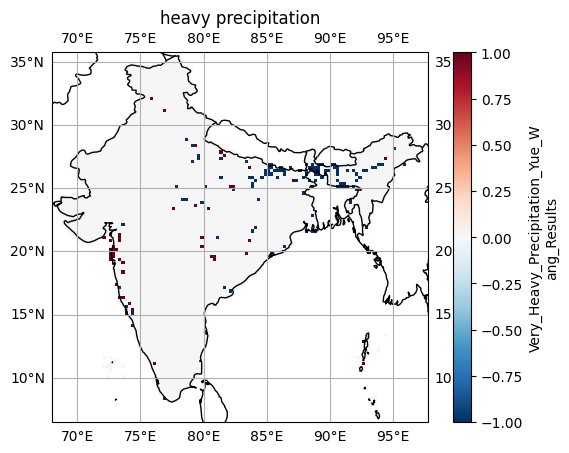

In [24]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('heavy precipitation')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## Contour plot

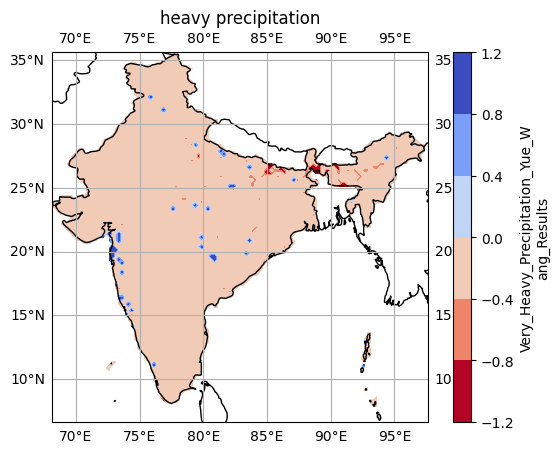

In [28]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap='coolwarm_r')

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('heavy precipitation')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

# 3rd Hour

In [29]:
very_heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION/{year}/{year}_03_eca_r20mm.nc')
    very_heavy_prec.append(data['very_heavy_precipitation_days_index_per_time_period'].values[0])
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [64]:
row=0
col=0
year=1
data_all_year_very_heavy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_very_heavy_prec_on_each_grid = []
for grids in very_heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_very_heavy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_very_heavy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(very_heavy_prec[index][row][col])!='nan'):
            data_all_year_very_heavy_prec.append(very_heavy_prec[index][row][col])
        all_values_for_very_heavy_prec_on_each_grid.append(data_all_year_very_heavy_prec)
        try:
            op = mk.yue_wang_modification_test(data_all_year_very_heavy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1
plot_data = np.array(plot_data).reshape(117,119)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:60: RuntimeWarning: invalid value encountered in divide
  return acov[:nlags+1]/acov[0]


In [65]:
very_heavy_prec_0_th_hour = xr.Dataset({
    "Very_Heavy_Precipitation_Yue_Wang_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)

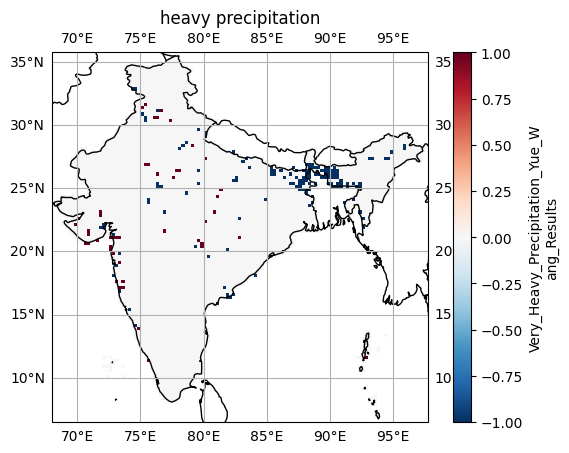

In [32]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('heavy precipitation')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

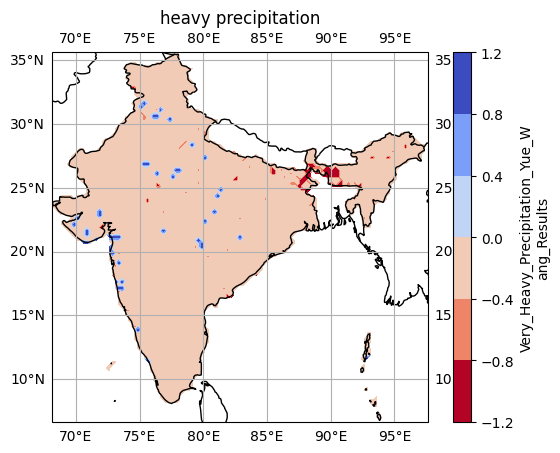

In [33]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap='coolwarm_r')

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('heavy precipitation')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 6th Hour

In [34]:
very_heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION/{year}/{year}_06_eca_r20mm.nc')
    very_heavy_prec.append(data['very_heavy_precipitation_days_index_per_time_period'].values[0])
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

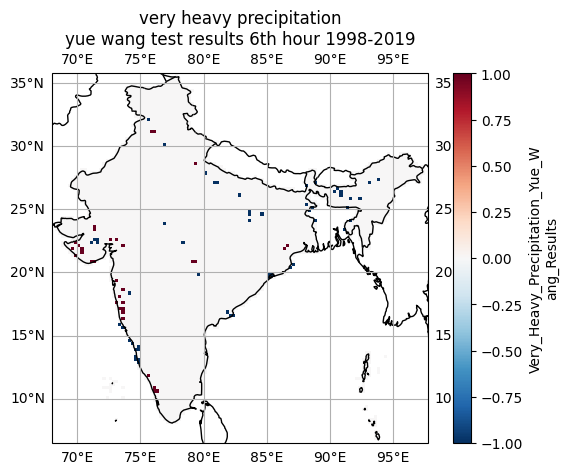

In [39]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('very heavy precipitation\nyue wang test results 6th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

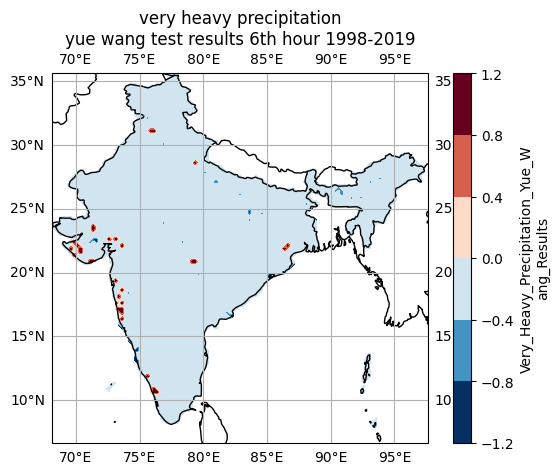

In [40]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot.contourf()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('very heavy precipitation\nyue wang test results 6th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 9th hour

In [41]:
very_heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION/{year}/{year}_09_eca_r20mm.nc')
    very_heavy_prec.append(data['very_heavy_precipitation_days_index_per_time_period'].values[0])
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

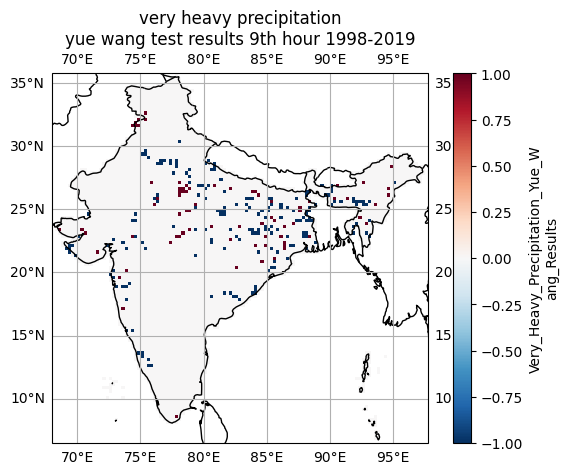

In [44]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('very heavy precipitation\nyue wang test results 9th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

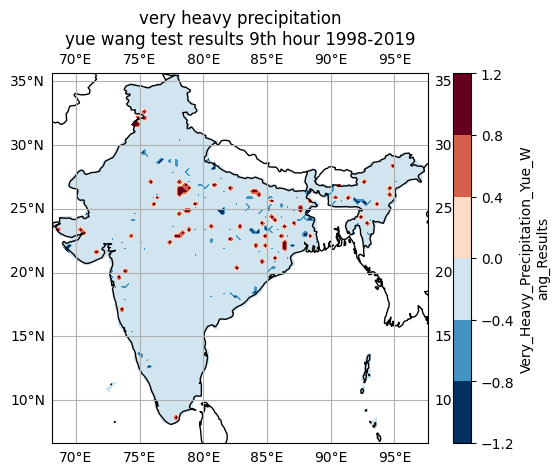

In [45]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot.contourf()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('very heavy precipitation\nyue wang test results 9th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 12th hour

In [46]:
very_heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION/{year}/{year}_12_eca_r20mm.nc')
    very_heavy_prec.append(data['very_heavy_precipitation_days_index_per_time_period'].values[0])
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

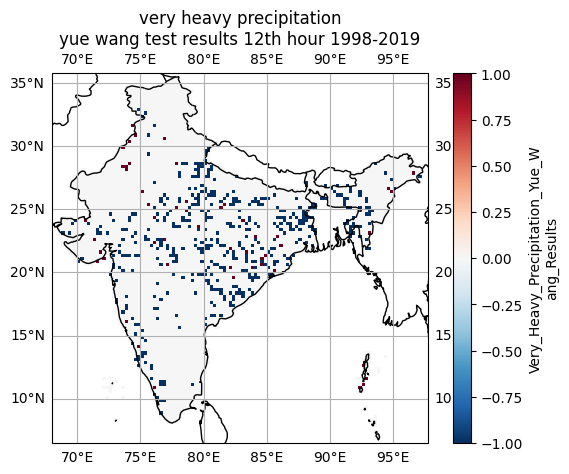

In [49]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('very heavy precipitation\nyue wang test results 12th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 


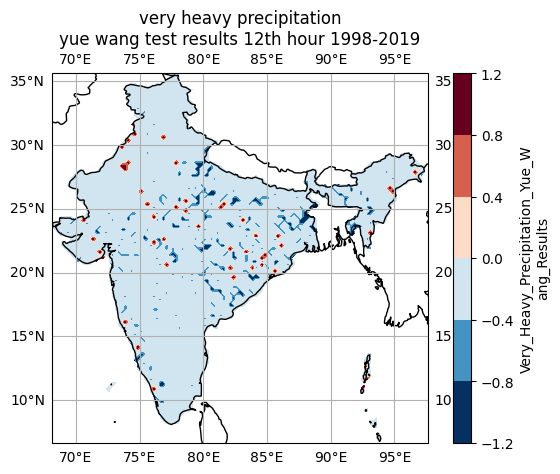

In [50]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot.contourf()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('very heavy precipitation\nyue wang test results 12th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 


## 15 Hour

In [51]:
very_heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION/{year}/{year}_15_eca_r20mm.nc')
    very_heavy_prec.append(data['very_heavy_precipitation_days_index_per_time_period'].values[0])
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

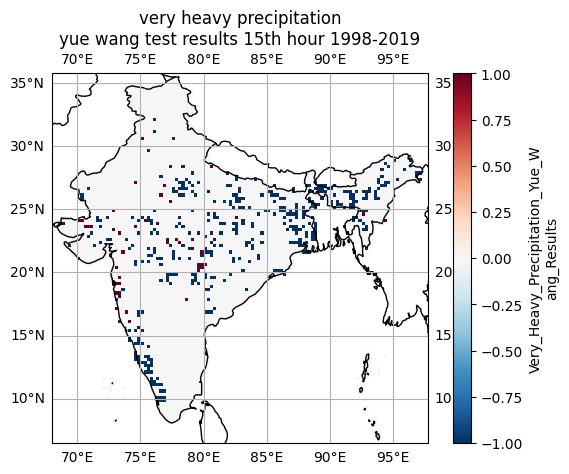

In [54]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('very heavy precipitation\nyue wang test results 15th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 


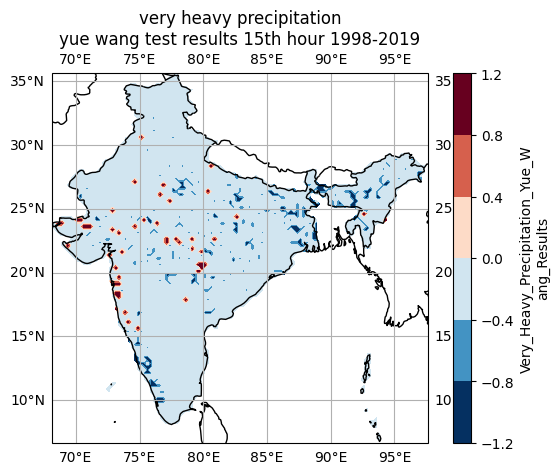

In [57]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot.contourf()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('very heavy precipitation\nyue wang test results 15th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 


## 18 Hour

In [56]:
very_heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION/{year}/{year}_18_eca_r20mm.nc')
    very_heavy_prec.append(data['very_heavy_precipitation_days_index_per_time_period'].values[0])
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

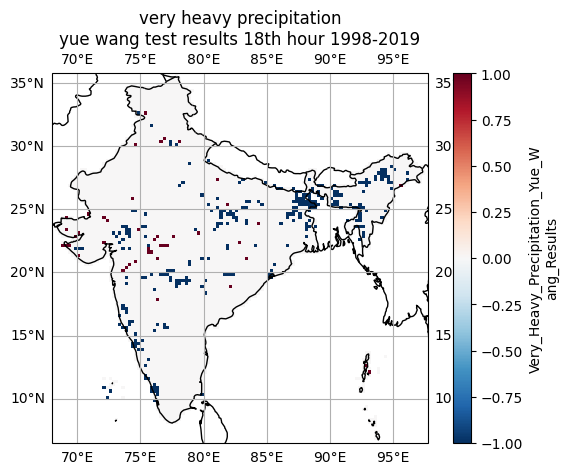

In [61]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('very heavy precipitation\nyue wang test results 18th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

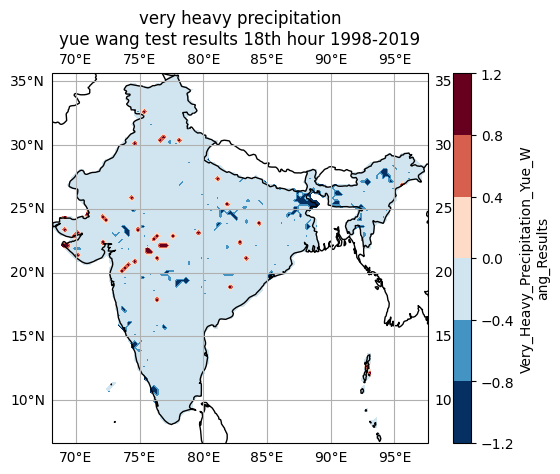

In [62]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot.contourf()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('very heavy precipitation\nyue wang test results 18th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 


## 21st Hour

In [63]:
very_heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION/{year}/{year}_21_eca_r20mm.nc')
    very_heavy_prec.append(data['very_heavy_precipitation_days_index_per_time_period'].values[0])
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

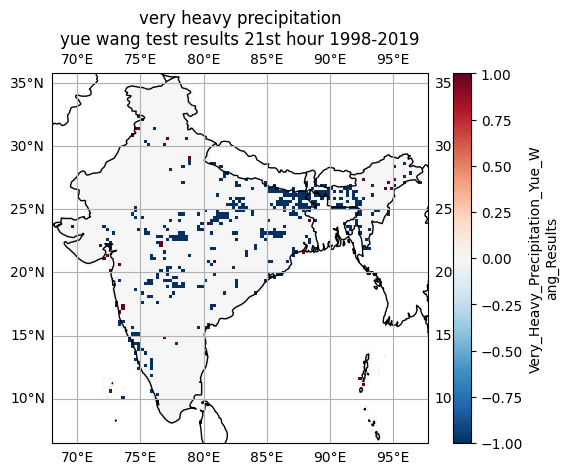

In [69]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('very heavy precipitation\nyue wang test results 21st hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 


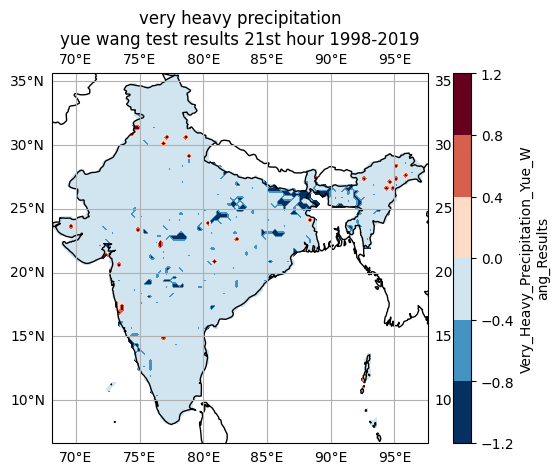

In [68]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
very_heavy_prec_0_th_hour['Very_Heavy_Precipitation_Yue_Wang_Results'].plot.contourf()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('very heavy precipitation\nyue wang test results 21st hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 


/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:60: RuntimeWarning: invalid value encountered in divide
  return acov[:nlags+1]/acov[0]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


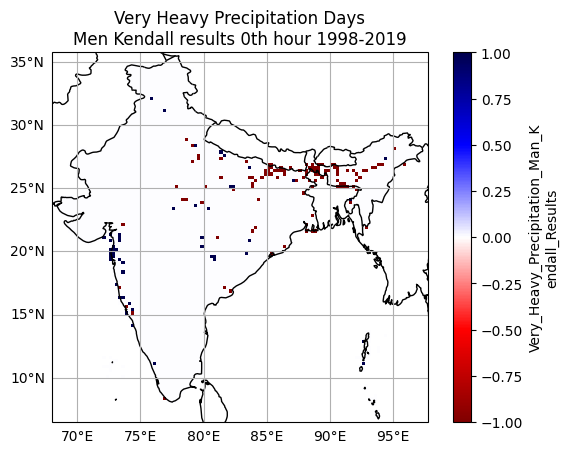

In [10]:
Very_Heavy_Prec = LoadData("00")
plot_data = Yue_Wang_Test(Very_Heavy_Prec)
PlotGraph(plot_data)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

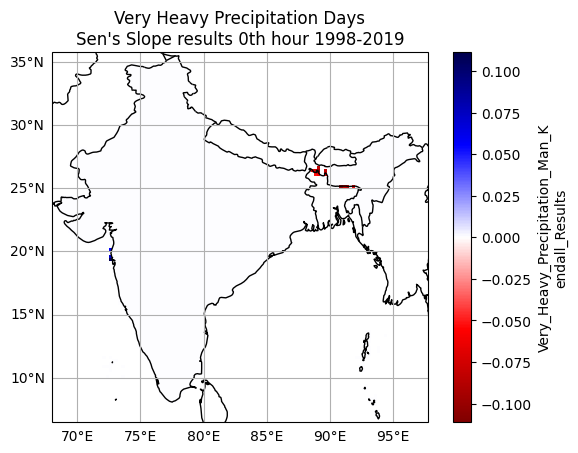

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


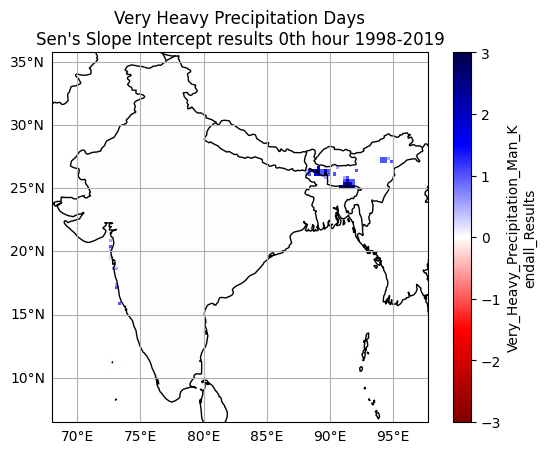

In [11]:
plot_data,intercept_plot = SenSlope(Very_Heavy_Prec)
PlotGraph(plot_data,test="Sen\'s Slope")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept")

## Mann Kendall Test

In [11]:
def SenSlope(max_1_day_prec):
    row=0
    col=0
    year=1
    data_all_year_max_1_day_prec = []
    plot_data=[]
    intercept_plot=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,22):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                slope,intercept = mk.sens_slope(data_all_year_max_1_day_prec) 
                plot_data.append(slope)
                intercept_plot.append(intercept)
            except:
                plot_data.append(np.nan)
                intercept_plot.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(117,119)
    intercept_plot = np.array(intercept_plot).reshape(117,119)
    plot_data = xr.Dataset({
    "Very_Heavy_Precipitation_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    
    intercept_plot = xr.Dataset({
    "Very_Heavy_Precipitation_Man_Kendall_Results":(["lat","lon"],intercept_plot),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data,intercept_plot

In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature
def PlotGraph(plot_data,test="Men Kendall",hour="0th",cmap=""):
    # Create a map using PlateCarree projection
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Add map features
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False  
    gl.ylabels_right = False 
    gl.xlines = True 
    gl.ylines = True 
    lats = data['lat'].values
    lons = data['lon'].values[:-2]
    # ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
    # ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
    if cmap != "":
        plot_data['Very_Heavy_Precipitation_Man_Kendall_Results'].plot(cmap=cmap)
    else:
        plot_data['Very_Heavy_Precipitation_Man_Kendall_Results'].plot(cmap="seismic_r")
    # ax.plot(lons,lats,color="#00000000")
    # Plot data

    # ax.scatter(lons, lats,transform=ccrs.PlateCarree())

    # Customize and display the map
    plt.title(f'Very Heavy Precipitation\n{test} results {hour} hour 1998-2019')
    plt.show()
    # turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

In [14]:
def ManKendallTest(max_1_day_prec):
    row=0
    col=0
    year=1
    data_all_year_max_1_day_prec = []
    plot_data=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,22):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                op = mk.original_test(data_all_year_max_1_day_prec) 
                mk_test_all_values.append(op)
                plot_data.append(op.Tau)
                # if(op.trend=='increasing'):
                #     plot_data.append(1)
                # elif(op.trend=='no trend'):
                #     plot_data.append(0)
                # else:
                #     plot_data.append(-1)
            except:
                plot_data.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(117,119)
    plot_data = xr.Dataset({
    "Very_Heavy_Precipitation_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data

In [30]:
def SenSlope(max_1_day_prec):
    row=0
    col=0
    count=[]
    data_all_year_max_1_day_prec = []
    plot_data=[]
    intercept_plot=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                slope,intercept = mk.sens_slope(data_all_year_max_1_day_prec) 
                plot_data.append(slope)
                intercept_plot.append(intercept)
                count.append(slope)
            except:
                plot_data.append(np.nan)
                intercept_plot.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(117,119)
    intercept_plot = np.array(intercept_plot).reshape(117,119)
    plot_data = xr.Dataset({
    "Very_Heavy_Precipitation_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    
    intercept_plot = xr.Dataset({
    "Very_Heavy_Precipitation_Man_Kendall_Results":(["lat","lon"],intercept_plot),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data,intercept_plot,count

In [8]:
def LoadData(hour):
    very_heavy_prec = []
    for year in range(1998,2020):
        data = xr.open_dataset(f'../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION/{year}/{year}_{hour}_eca_r20mm.nc')
        very_heavy_prec.append(data['very_heavy_precipitation_days_index_per_time_period'].values[0])
    return very_heavy_prec

## 0th Hour

In [1]:
very_heavy_prec = LoadData("00")
very_heavy_prec

NameError: name 'LoadData' is not defined

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


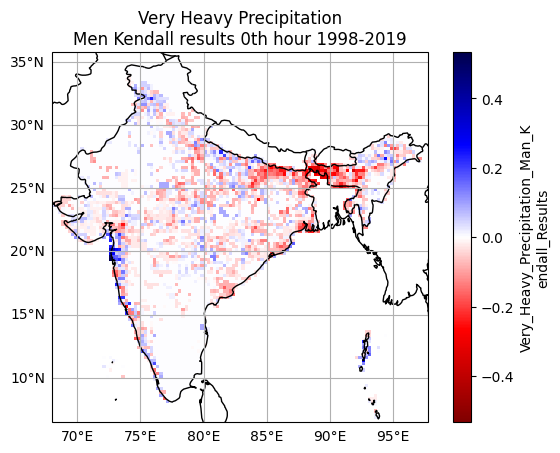

In [15]:
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data)

# 3rd Hour

In [16]:
very_heavy_prec = LoadData("03")
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


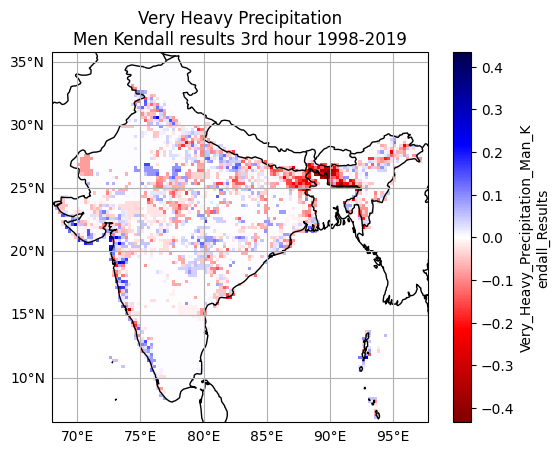

In [17]:
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data,hour="3rd")

# 6th Hour

In [18]:
very_heavy_prec = LoadData("06")
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


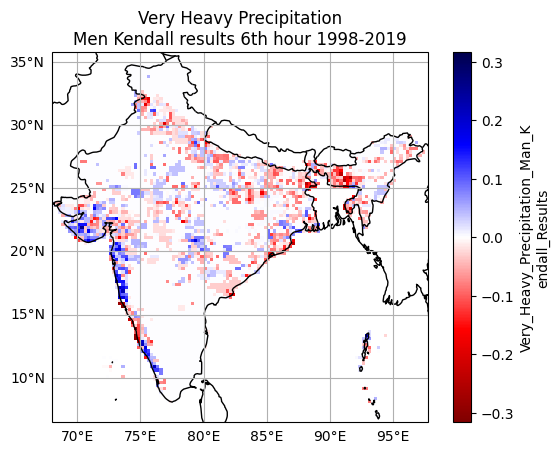

In [19]:
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data,hour="6th")

# 9th Hour

In [20]:
very_heavy_prec = LoadData("09")
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


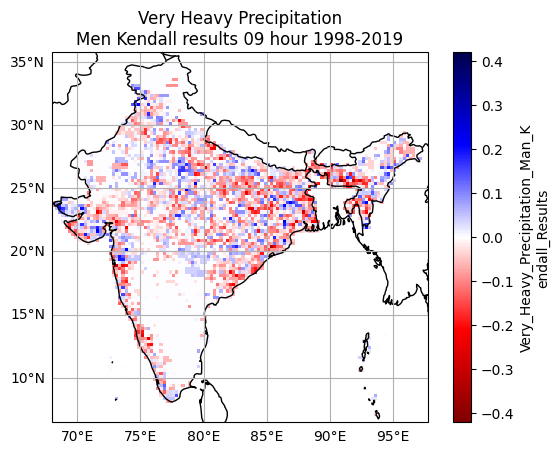

In [21]:
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data,hour="09")

# 12th Hour

In [22]:
very_heavy_prec = LoadData("12")
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


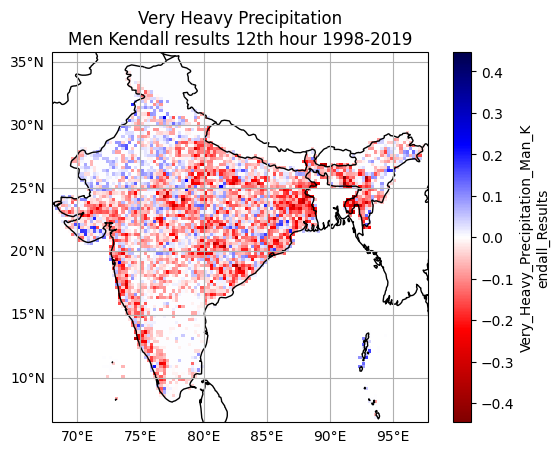

In [23]:
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data,hour="12th")

# 15th Hour

In [24]:
very_heavy_prec = LoadData("15")
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


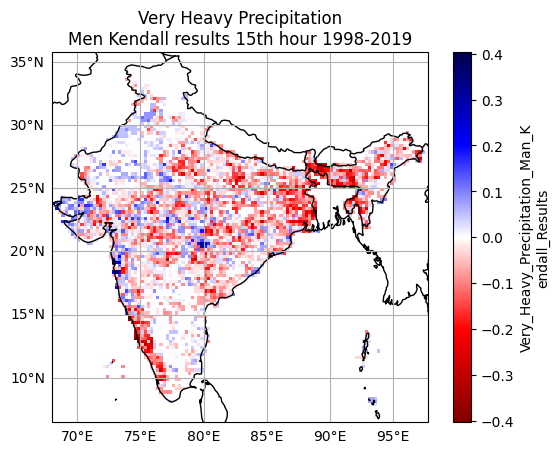

In [25]:
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data,hour="15th")

# 18th Hour

In [26]:
very_heavy_prec = LoadData("18")
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


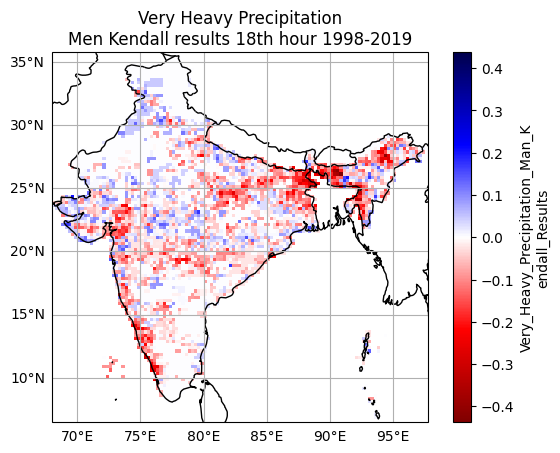

In [27]:
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data,hour="18th")

# 21st Hour

In [28]:
very_heavy_prec = LoadData("21")
very_heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


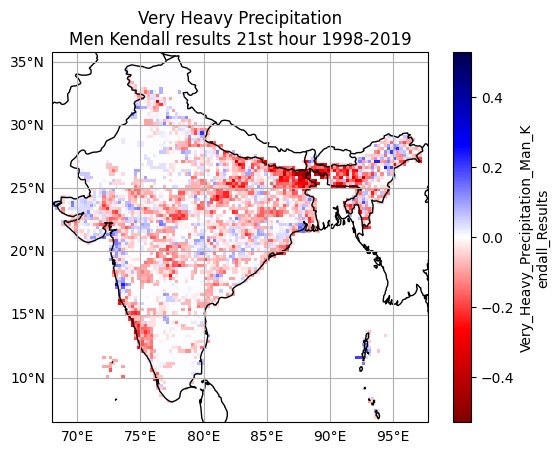

In [29]:
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data,hour="21st")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

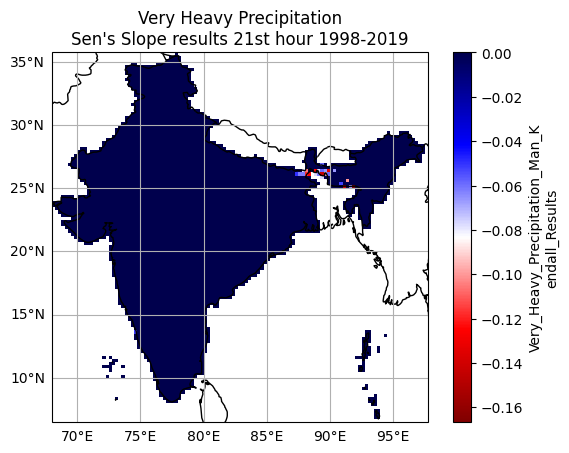

In [31]:
plot_data,intercept_plot,count = SenSlope(very_heavy_prec)
PlotGraph(plot_data,test="Sen\'s Slope",hour="21st")